# Poverty Prediction

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import numpy.random as nr
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
from sklearn import feature_selection as fs
import sklearn.decomposition as skde
import sklearn.metrics as sklm
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
from sklearn.linear_model import ElasticNet, Lasso,  Ridge, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import r2_score
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Data Pre-processing

In [3]:
# Combining two files
df_features = pd.read_csv('train_values_wJZrCmI.csv')
df_labels = pd.read_csv('train_labels.csv')
df = df_features.merge(df_labels, on='row_id')

df.shape

(12600, 60)

In [4]:
df.head()

,row_id,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,...,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability
0,0,C,False,18.0,True,True,P,Other,1.0,True,...,True,True,False,False,False,False,1,0,1,0.515
1,1,C,True,30.0,True,True,P,Other,1.0,True,...,True,True,False,False,False,False,1,0,0,0.981
2,2,A,False,20.0,True,True,Q,Spouse,1.0,True,...,False,False,False,False,False,False,0,0,0,0.982
3,3,A,False,61.0,False,True,Q,Head,0.0,False,...,False,False,False,False,False,False,0,0,0,0.879
4,4,D,False,26.0,True,True,X,Spouse,1.0,True,...,False,False,False,False,False,False,1,0,3,0.796


### Data Exploration

In [5]:
df_train_cat = [var for var in df.columns if df[var].dtype == 'O']
print('There are {} categorical variables in Train Data \n'.format(len(df_train_cat)))
print('Categorical Variables are :', df_train_cat)

There are 5 categorical variables in Train Data 

Categorical Variables are : ['country', 'religion', 'relationship_to_hh_head', 'employment_category_last_year', 'employment_type_last_year']


In [6]:
df_train_num = [num for num in df.columns if df[num].dtype == 'bool']
print('There are {} Boolean variable in Train Data \n'.format(len(df_train_num)))
print("Boolean Variables are", df_train_num)

There are 37 Boolean variable in Train Data 

Boolean Variables are ['is_urban', 'female', 'married', 'literacy', 'can_add', 'can_divide', 'can_calc_percents', 'can_calc_compounding', 'employed_last_year', 'income_ag_livestock_last_year', 'income_friends_family_last_year', 'income_government_last_year', 'income_own_business_last_year', 'income_private_sector_last_year', 'income_public_sector_last_year', 'formal_savings', 'informal_savings', 'cash_property_savings', 'has_insurance', 'has_investment', 'borrowed_for_emergency_last_year', 'borrowed_for_daily_expenses_last_year', 'borrowed_for_home_or_biz_last_year', 'can_call', 'can_text', 'can_use_internet', 'can_make_transaction', 'advanced_phone_use', 'reg_bank_acct', 'reg_mm_acct', 'reg_formal_nbfi_account', 'financially_included', 'active_bank_user', 'active_mm_user', 'active_formal_nbfi_user', 'active_informal_nbfi_user', 'nonreg_active_mm_user']


In [7]:
df_train_num = [num for num in df.columns if (df[num].dtype != 'bool') & (df[num].dtype != 'O')]
print('There are {} Numerical variable in Train Data \n'.format(len(df_train_num)))
print("Numerical Variables are", df_train_num)

There are 18 Numerical variable in Train Data 

Numerical Variables are ['row_id', 'age', 'education_level', 'share_hh_income_provided', 'num_times_borrowed_last_year', 'borrowing_recency', 'bank_interest_rate', 'mm_interest_rate', 'mfi_interest_rate', 'other_fsp_interest_rate', 'num_shocks_last_year', 'avg_shock_strength_last_year', 'phone_technology', 'phone_ownership', 'num_formal_institutions_last_year', 'num_informal_institutions_last_year', 'num_financial_activities_last_year', 'poverty_probability']


As we see there are 59 variables as our dataset is real.

### Drop duplicates

In [8]:
df = df.drop_duplicates(keep = 'last')
df = df.drop_duplicates(subset = 'row_id', keep = 'last')

df.shape

(12600, 60)

Checking any duplicacy

### Treat missing values
Dropping columns with mostly missing values:

In [9]:
import missingno as mso

<AxesSubplot:>

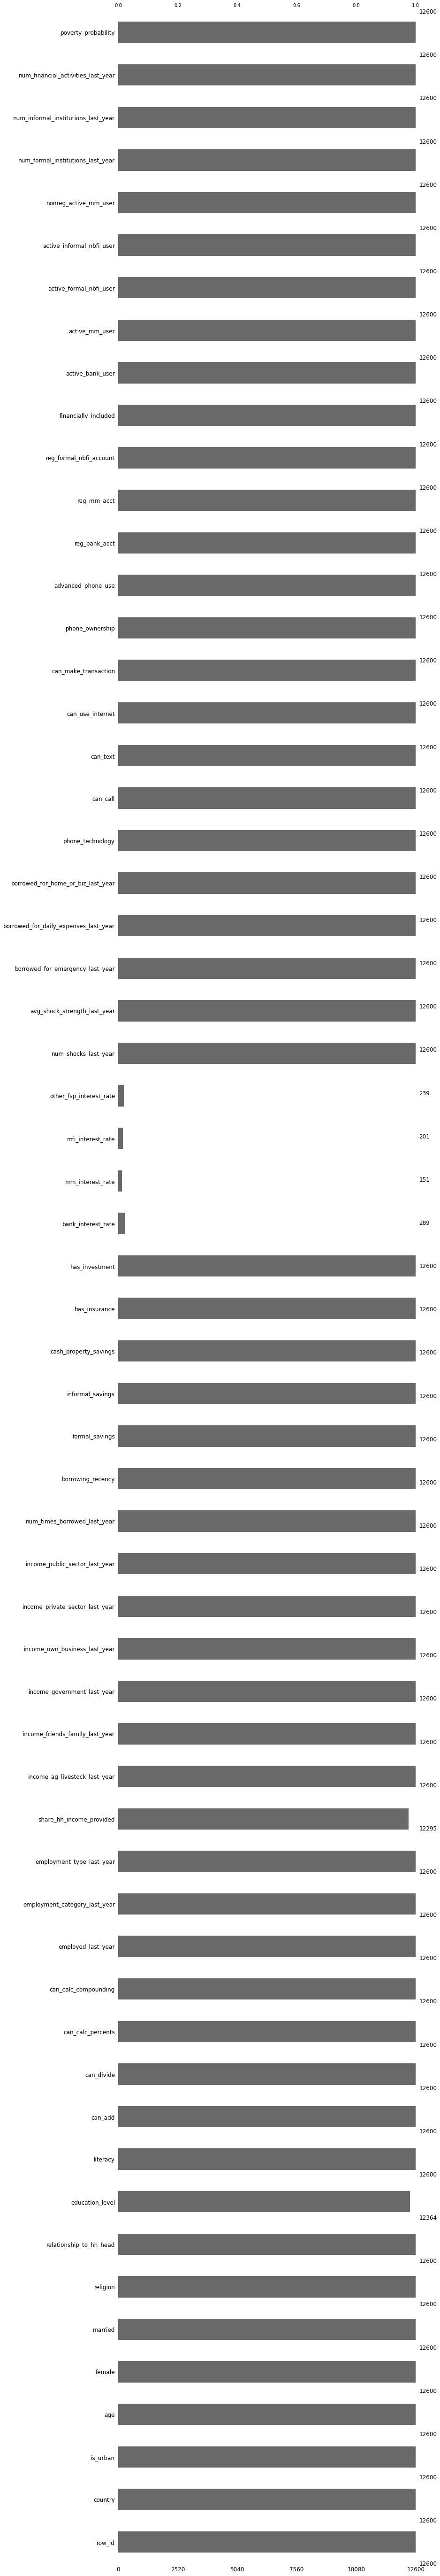

In [10]:
plt.figure(figsize = (25, 100))
axz = plt.subplot(1,2,2)
mso.bar(df, ax = axz, fontsize = 12)

In [11]:
# Dropping four variables
print(df.isnull().sum())

df.drop('bank_interest_rate', axis = 1, inplace = True)
df.drop('mm_interest_rate', axis = 1, inplace = True)
df.drop('mfi_interest_rate', axis = 1, inplace = True)
df.drop('other_fsp_interest_rate', axis = 1, inplace = True)

df.isnull().sum()

row_id                                       0
country                                      0
is_urban                                     0
age                                          0
female                                       0
married                                      0
religion                                     0
relationship_to_hh_head                      0
education_level                            236
literacy                                     0
can_add                                      0
can_divide                                   0
can_calc_percents                            0
can_calc_compounding                         0
employed_last_year                           0
employment_category_last_year                0
employment_type_last_year                    0
share_hh_income_provided                   305
income_ag_livestock_last_year                0
income_friends_family_last_year              0
income_government_last_year                  0
income_own_bu

row_id                                     0
country                                    0
is_urban                                   0
age                                        0
female                                     0
married                                    0
religion                                   0
relationship_to_hh_head                    0
education_level                          236
literacy                                   0
can_add                                    0
can_divide                                 0
can_calc_percents                          0
can_calc_compounding                       0
employed_last_year                         0
employment_category_last_year              0
employment_type_last_year                  0
share_hh_income_provided                 305
income_ag_livestock_last_year              0
income_friends_family_last_year            0
income_government_last_year                0
income_own_business_last_year              0
income_pri

#### Replace missing values   
Assigning missing values to a new category for both `education_level` and `share_hh_income_provided` gives with best R-squared for our regression model.

In [12]:
df['education_level'].fillna(4, inplace=True)
df['share_hh_income_provided'].fillna(0, inplace=True)

df.isnull().sum()

row_id                                   0
country                                  0
is_urban                                 0
age                                      0
female                                   0
married                                  0
religion                                 0
relationship_to_hh_head                  0
education_level                          0
literacy                                 0
can_add                                  0
can_divide                               0
can_calc_percents                        0
can_calc_compounding                     0
employed_last_year                       0
employment_category_last_year            0
employment_type_last_year                0
share_hh_income_provided                 0
income_ag_livestock_last_year            0
income_friends_family_last_year          0
income_government_last_year              0
income_own_business_last_year            0
income_private_sector_last_year          0
income_publ

In [13]:
df.dtypes

row_id                                     int64
country                                   object
is_urban                                    bool
age                                      float64
female                                      bool
married                                     bool
religion                                  object
relationship_to_hh_head                   object
education_level                          float64
literacy                                    bool
can_add                                     bool
can_divide                                  bool
can_calc_percents                           bool
can_calc_compounding                        bool
employed_last_year                          bool
employment_category_last_year             object
employment_type_last_year                 object
share_hh_income_provided                 float64
income_ag_livestock_last_year               bool
income_friends_family_last_year             bool
income_government_la

As we see many variables are bool and only 4 are numerical

### Drop unecessary feature

In [14]:
df = df.drop(['row_id'], axis = 1)

In [15]:
df.head()

,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,can_add,...,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability
0,C,False,18.0,True,True,P,Other,1.0,True,True,...,True,True,False,False,False,False,1,0,1,0.515
1,C,True,30.0,True,True,P,Other,1.0,True,True,...,True,True,False,False,False,False,1,0,0,0.981
2,A,False,20.0,True,True,Q,Spouse,1.0,True,True,...,False,False,False,False,False,False,0,0,0,0.982
3,A,False,61.0,False,True,Q,Head,0.0,False,True,...,False,False,False,False,False,False,0,0,0,0.879
4,D,False,26.0,True,True,X,Spouse,1.0,True,False,...,False,False,False,False,False,False,1,0,3,0.796


Removing outliers decreased our R-squared.

<AxesSubplot:ylabel='age'>

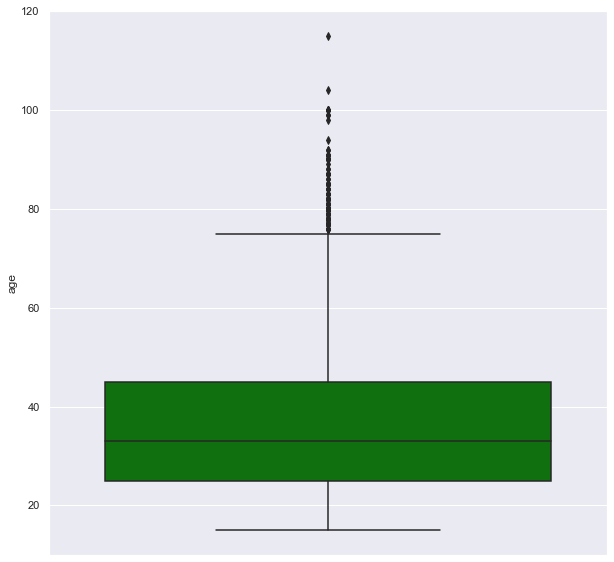

In [16]:
sns.set(style="darkgrid")
plt.figure(figsize = (10, 10))
sns.boxplot(data=df, y="age", color='green')

<AxesSubplot:ylabel='poverty_probability'>

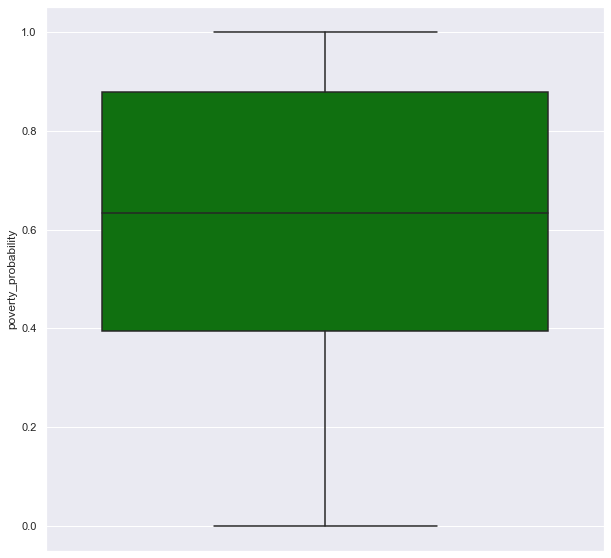

In [17]:
sns.set(style="darkgrid")
plt.figure(figsize = (10, 10))
sns.boxplot(data=df, y="poverty_probability", color='green')

In [18]:
# As there is no outlier in Target Variable
# only outliers in AGE Variable

In [19]:
df.shape

(12600, 55)

# Exploratory data analysis
### Exploring the label

Square transformation on the label produces a less skewed distribution, but decreases our R-squared. Other transformations did not make the distribution more normal.

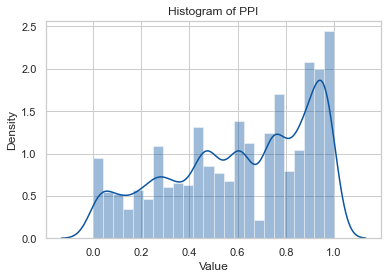

In [20]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.set(style="whitegrid", palette='Blues_r')
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()
    
sns.set_style("whitegrid")
hist_plot(df['poverty_probability'], 'PPI')

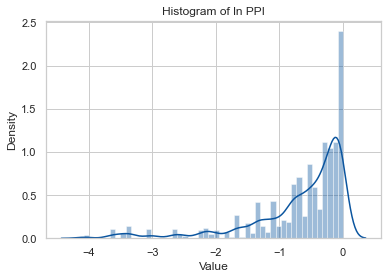

In [21]:
#FUNCTION FOR returning 0 for ln(0)
from numpy import errstate,isneginf
a = df['poverty_probability']
with errstate(divide='ignore'):
    res = np.log(a)
res[isneginf(res)]=0
hist_plot(res, 'ln PPI')

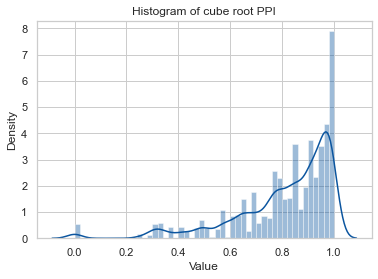

In [22]:
#CUBE ROOT LABELS
df['cbrt_poverty_probability'] = np.cbrt(df['poverty_probability'])
hist_plot(df['cbrt_poverty_probability'], 'cube root PPI')

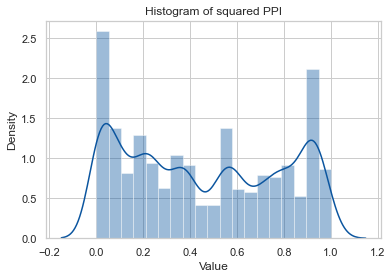

In [23]:
#SQUARE LABELS
df['squared_poverty_probability'] = np.square(df['poverty_probability'])
hist_plot(df['squared_poverty_probability'], 'squared PPI')

In [24]:
df.shape

(12600, 57)

### Exploring features

In [25]:
list(df.columns.values)

['country',
 'is_urban',
 'age',
 'female',
 'married',
 'religion',
 'relationship_to_hh_head',
 'education_level',
 'literacy',
 'can_add',
 'can_divide',
 'can_calc_percents',
 'can_calc_compounding',
 'employed_last_year',
 'employment_category_last_year',
 'employment_type_last_year',
 'share_hh_income_provided',
 'income_ag_livestock_last_year',
 'income_friends_family_last_year',
 'income_government_last_year',
 'income_own_business_last_year',
 'income_private_sector_last_year',
 'income_public_sector_last_year',
 'num_times_borrowed_last_year',
 'borrowing_recency',
 'formal_savings',
 'informal_savings',
 'cash_property_savings',
 'has_insurance',
 'has_investment',
 'num_shocks_last_year',
 'avg_shock_strength_last_year',
 'borrowed_for_emergency_last_year',
 'borrowed_for_daily_expenses_last_year',
 'borrowed_for_home_or_biz_last_year',
 'phone_technology',
 'can_call',
 'can_text',
 'can_use_internet',
 'can_make_transaction',
 'phone_ownership',
 'advanced_phone_use',
 'r

The feautre age_group is created from age:

In [26]:
def create_age_group(data):
    age_conditions = [
    (data['age'] < 30 ),
    (data['age'] >= 30) & (data['age'] < 45),
    (data['age'] >= 45) & (data['age'] < 60),
    (data['age'] >= 60)
    ]
    age_choices = ['Under 30', '30 to 44', '45 to 59', '60 or Over']
    data['age_group'] = np.select(age_conditions, age_choices)

create_age_group(df)

#### Exploring categorical features
Counting unique values for categorical features - we see that some features, like religion, have values with very little data. Feature engineering will be performed to solve the problem.

Note that some discrete numerical features are treated as categorical features.

In [27]:
def count_unique(df, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(df[col].value_counts())

cat_cols = ['age_group','country','is_urban','female','married','religion','relationship_to_hh_head',
 'education_level','literacy','can_add','can_divide','can_calc_percents','can_calc_compounding',
 'employed_last_year','employment_category_last_year','employment_type_last_year',
 'income_ag_livestock_last_year','income_friends_family_last_year','income_government_last_year',
 'income_own_business_last_year','income_private_sector_last_year','income_public_sector_last_year',
 'borrowing_recency','formal_savings','informal_savings','cash_property_savings',
 'has_insurance','has_investment','borrowed_for_emergency_last_year','borrowed_for_daily_expenses_last_year',
 'borrowed_for_home_or_biz_last_year','phone_technology','can_call','can_text','can_use_internet',
 'can_make_transaction','phone_ownership','advanced_phone_use','reg_bank_acct',
 'reg_mm_acct','reg_formal_nbfi_account','financially_included','active_bank_user',
 'active_mm_user','active_formal_nbfi_user','active_informal_nbfi_user','nonreg_active_mm_user', 'share_hh_income_provided', 
'num_times_borrowed_last_year','num_shocks_last_year','num_formal_institutions_last_year',
            'num_informal_institutions_last_year']

count_unique(df, cat_cols)
df.shape


For column age_group
Under 30      4952
30 to 44      4236
45 to 59      2183
60 or Over    1229
Name: age_group, dtype: int64

For column country
J    1843
D    1829
I    1812
G    1805
A    1773
C    1769
F    1769
Name: country, dtype: int64

For column is_urban
False    8460
True     4140
Name: is_urban, dtype: int64

For column female
True     7028
False    5572
Name: female, dtype: int64

For column married
True     8172
False    4428
Name: married, dtype: int64

For column religion
Q    5469
X    5297
P    1694
O      85
N      55
Name: religion, dtype: int64

For column relationship_to_hh_head
Head              5229
Spouse            4162
Son/Daughter      2177
Father/Mother      415
Other              321
Sister/Brother     278
Unknown             18
Name: relationship_to_hh_head, dtype: int64

For column education_level
1.0    4550
2.0    4083
0.0    2545
3.0    1186
4.0     236
Name: education_level, dtype: int64

For column literacy
True     7736
False    4864
Name: litera

(12600, 58)

Creating violin plots for all categorical features against our label PPI - only some features have values that are distinctively different in PPI distributions.

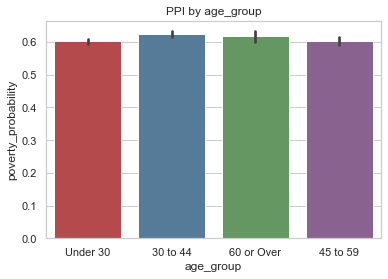

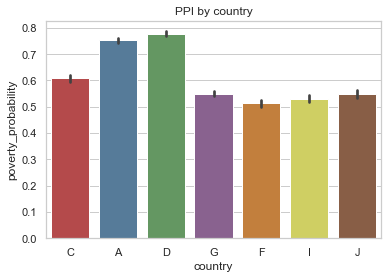

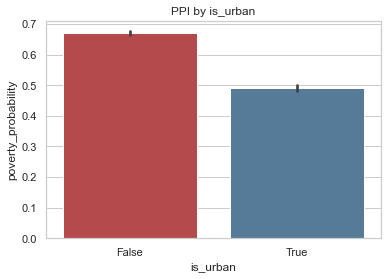

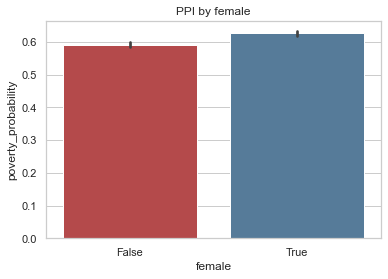

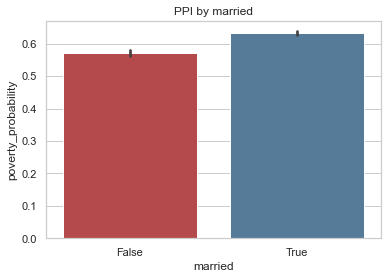

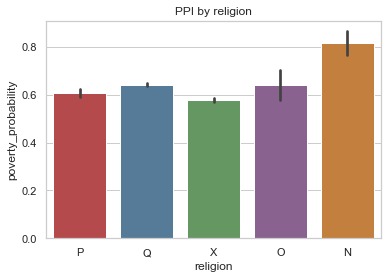

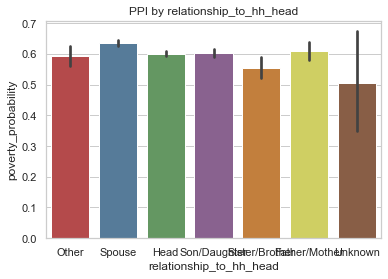

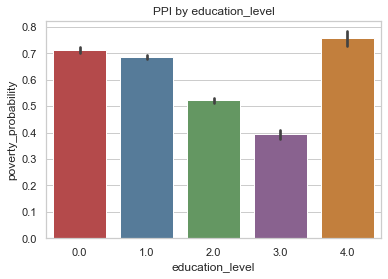

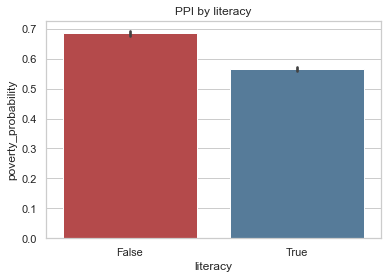

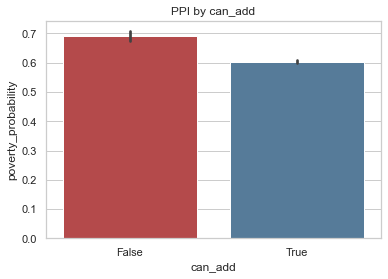

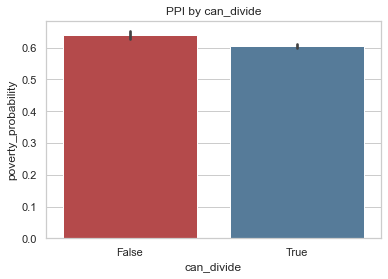

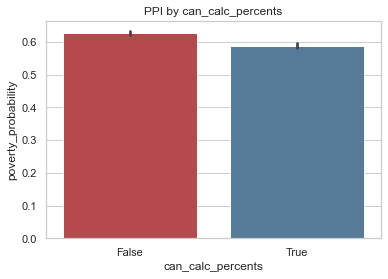

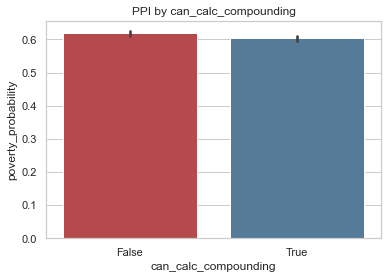

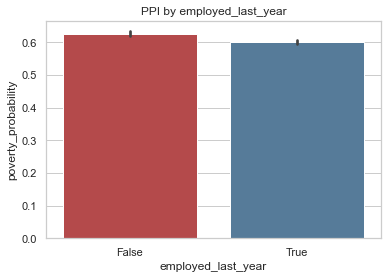

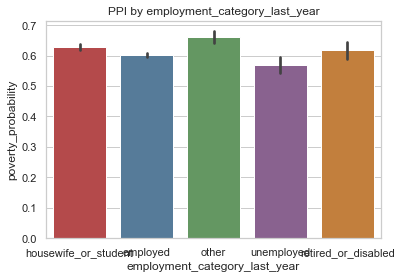

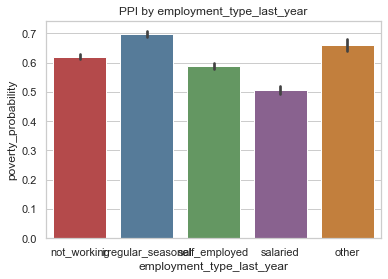

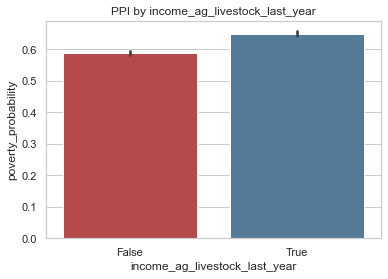

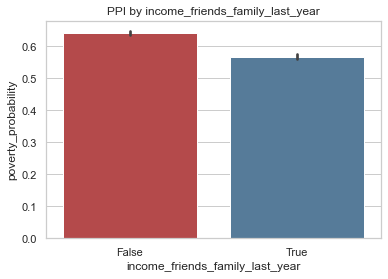

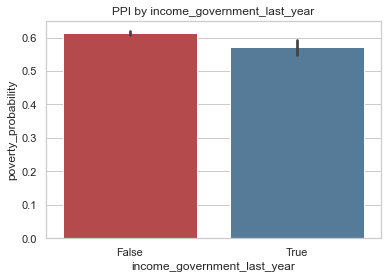

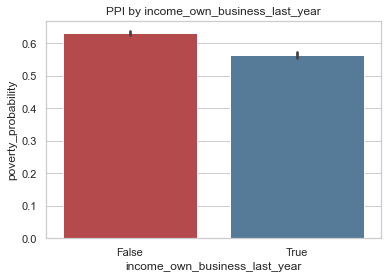

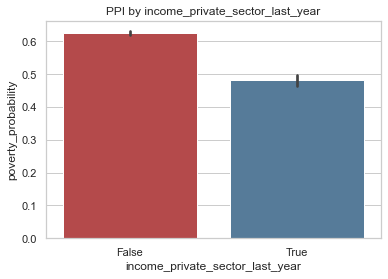

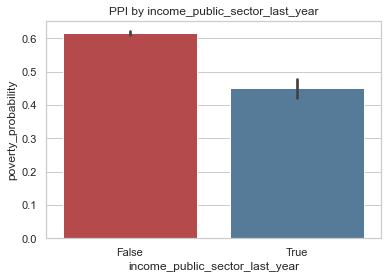

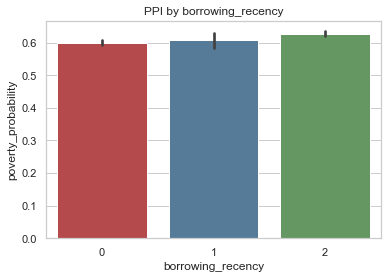

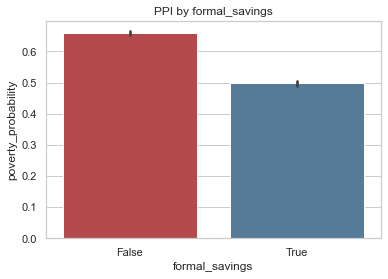

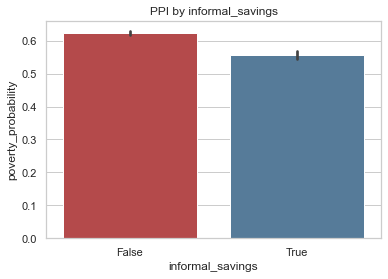

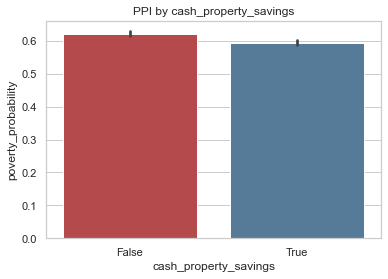

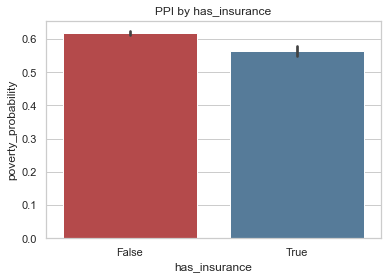

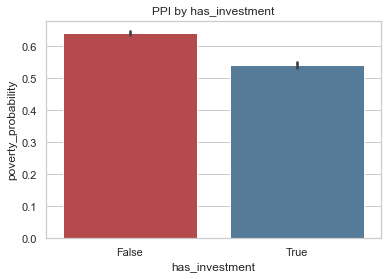

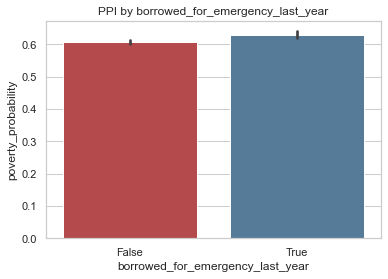

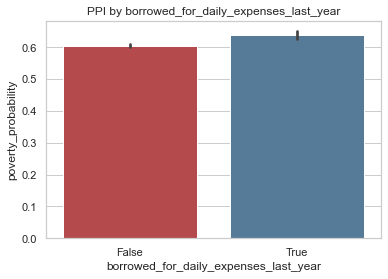

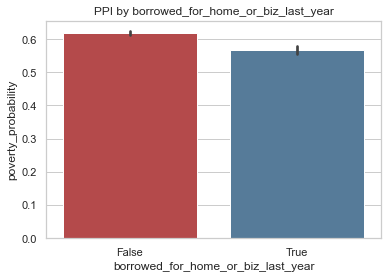

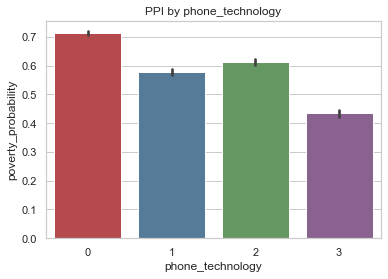

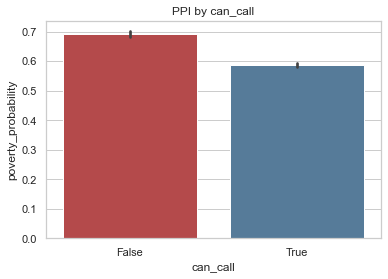

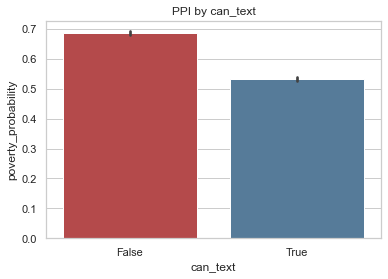

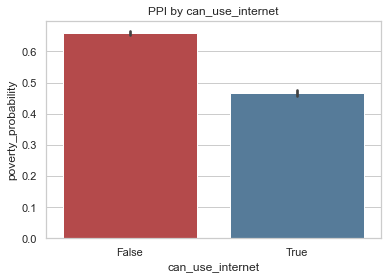

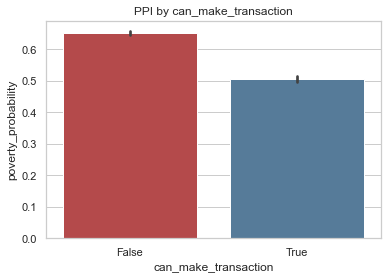

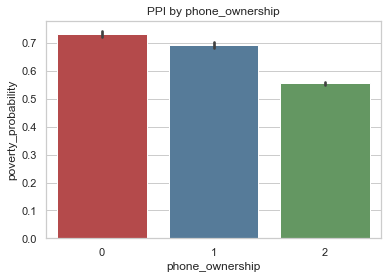

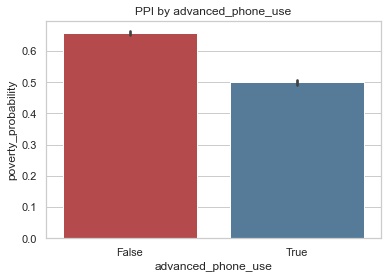

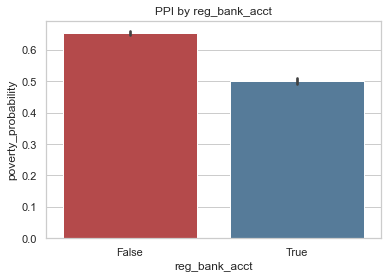

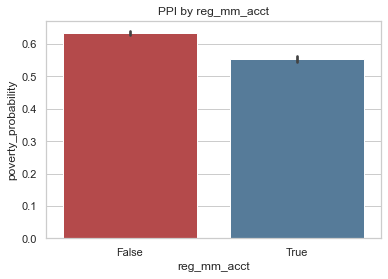

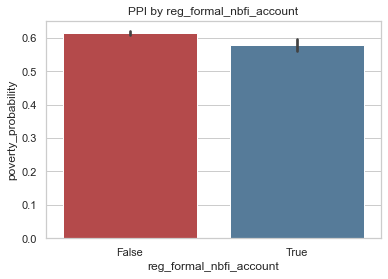

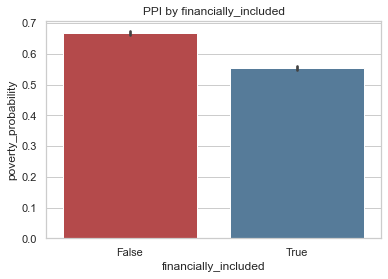

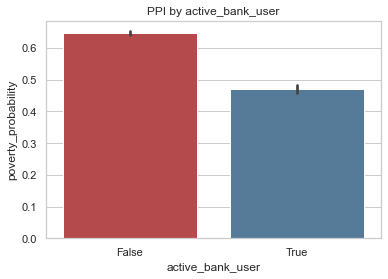

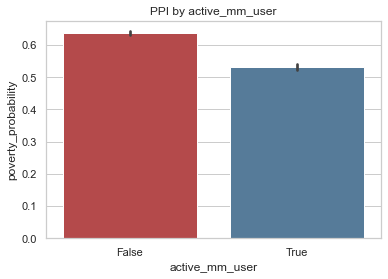

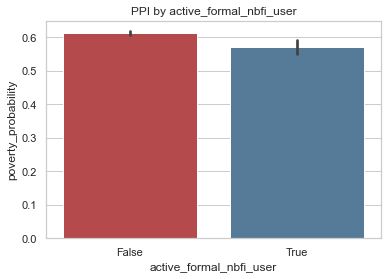

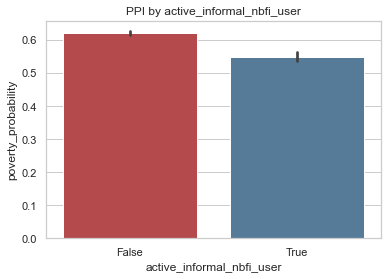

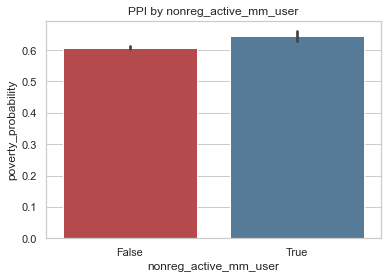

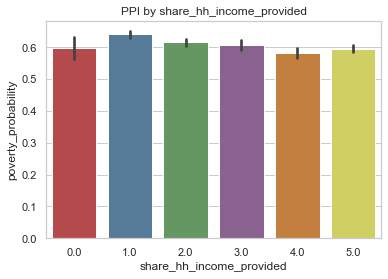

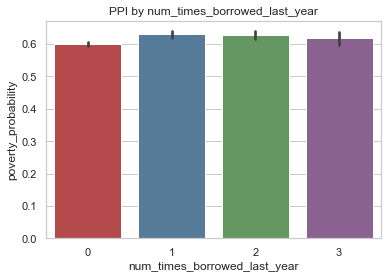

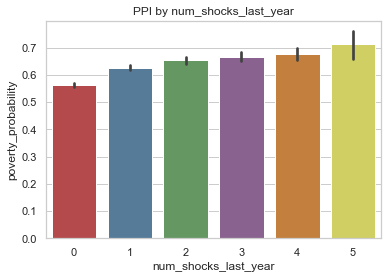

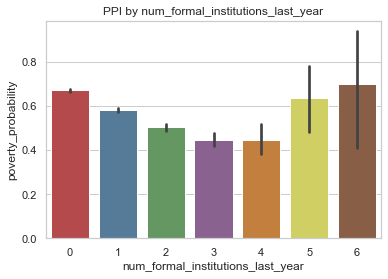

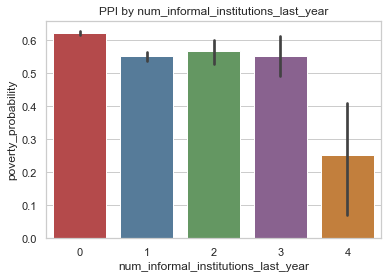

In [30]:
def plot_bar(df, cols, col_y, title):
    for col in cols:
        sns.set(style="whitegrid")
        sns.set_palette("Set1", n_colors=7, desat=.7)
        sns.barplot(col, col_y, data=df)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.title(title + ' by ' + col)
        plt.show()
        
plot_bar(df, cat_cols, 'poverty_probability', 'PPI')    

#### Explore numeric features
Creating combined kernel density estimation and histogram plots for all numeric features:

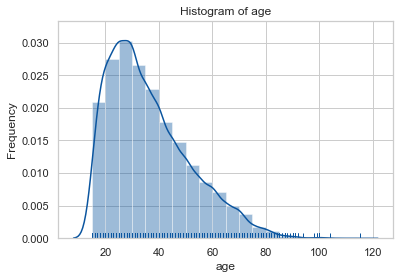

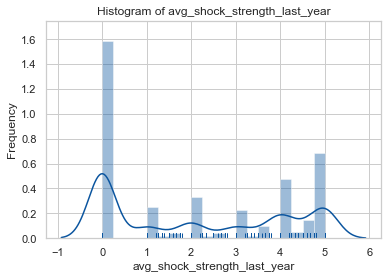

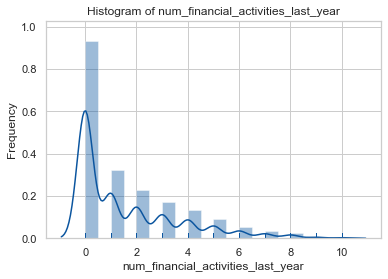

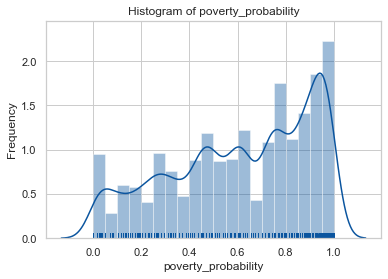

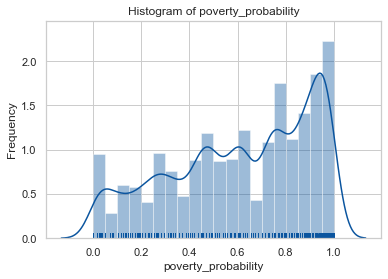

In [28]:
num_cols = ['age', 'avg_shock_strength_last_year', 
            'num_financial_activities_last_year', 
            'poverty_probability', 'poverty_probability'] 

def plot_density_hist(df, cols, bins = 10, hist = False):
    for col in cols:
        sns.set(style="whitegrid", palette='Blues_r')
        sns.distplot(df[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Frequency')# Set text for y axis
        plt.show()
        
plot_density_hist(df, num_cols, bins = 20, hist = True)

A pairplot and a correlation matrix of numeric features is created - apparent relationships are neither found within numeric features, and between the label and these features.

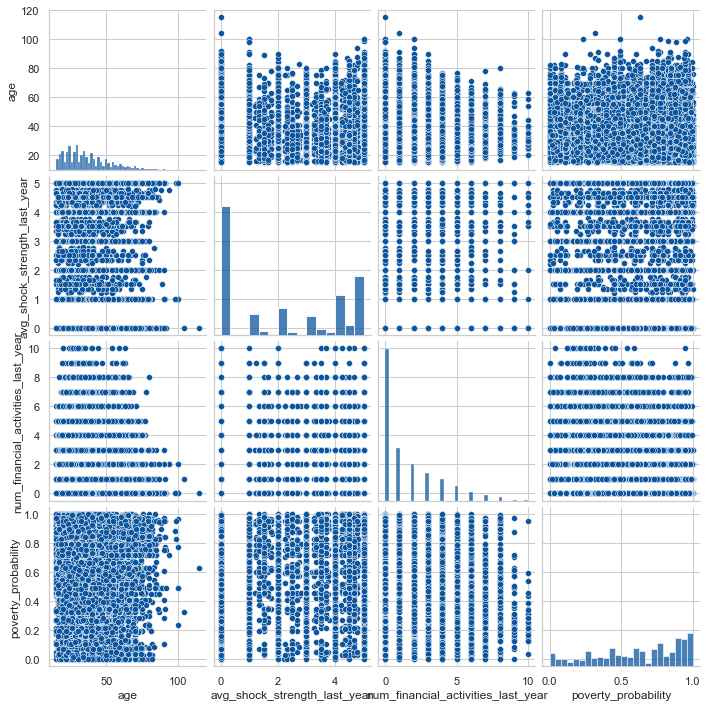

In [29]:
num_cols = ['age', 'avg_shock_strength_last_year', 
            'num_financial_activities_last_year', 'poverty_probability'] 

sns.set(style="whitegrid", palette='Blues_r')
sns.pairplot(df[num_cols])

However, on average, the amount of financial activities seems to decrease with age.

In [30]:
## Compute the correlation matrix
corrs = df[num_cols].corr()

## Create the hierarchical clustering model
dist = sch.distance.pdist(corrs)   # vector of pairwise distances using correlations
linkage = sch.linkage(dist, method='complete') # Compute the linkages for the clusters
ind = sch.fcluster(linkage, 0.5*dist.max(), 'distance')  # Apply the clustering algorithm

## Order the columns of the correlaton matrix according to the hierarchy
columns = [corrs.columns.tolist()[i] for i in list((np.argsort(ind)))]  # Order the names for the result
corrs_clustered = corrs.reindex(columns) ## Reindex the columns following the heirarchy 

## Correlation Plot
corrs_clustered.style.background_gradient().set_precision(2)

,age,avg_shock_strength_last_year,num_financial_activities_last_year,poverty_probability
avg_shock_strength_last_year,0.07,1.00,0.07,0.13
poverty_probability,0.01,0.13,-0.26,1.00
age,1.00,0.07,-0.05,0.01
num_financial_activities_last_year,-0.05,0.07,1.00,-0.26


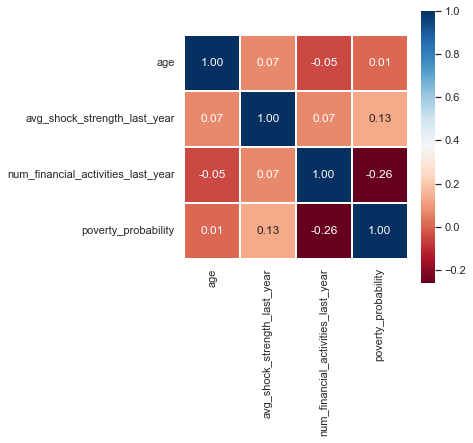

In [31]:
num_corrs = df[num_cols].corr()
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(num_corrs, annot=True, square=True, linewidths=.1, fmt= '.2f',ax=ax, 
           cmap="RdBu")
plt.show()

### Feature engineering
#### Aggregate categorical features

The aggregation of categorical features was performed to reduce the number of categories. For discrete variables, rare values are combined to form a range of values. For categorical variables, rare values are combined with common values that share a more similar distribution in PPI.

- Religion O is combined with religion P to form religion O_P, and religion N is combined with religion Q to form religion ‘N_Q’
- The number of shocks of 4 or above are combined to form ‘4_5’
- The number of formal financial institutions used of 3 or above are combined to form ‘3_4_5_6’
- The number of informal financial institutions used of 2 or above are combined to form ‘2_3_4’
- The number of shocks of 4 or above are combined to form ‘4_5’ 
- The category ‘Unknown’ for relationship to the head of the household is combined with ‘Other’

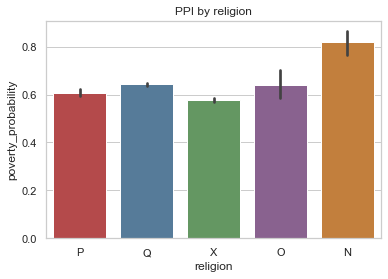

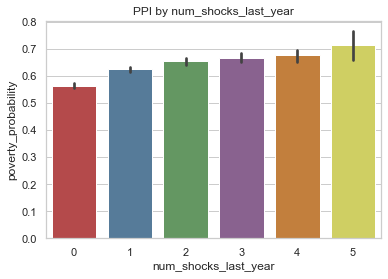

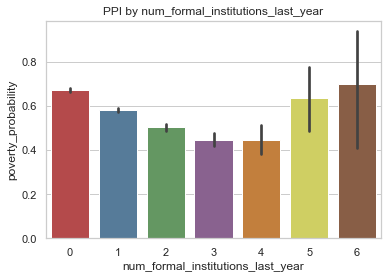

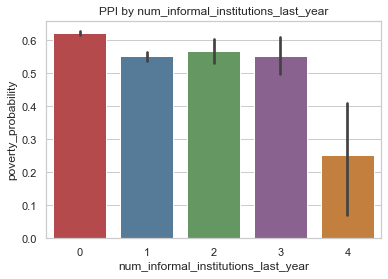

In [31]:
def plot_box_1(df, col, col_y, title):
    sns.set_style("whitegrid")
    sns.set_palette("Set1", n_colors=7, desat=.7)
    sns.boxplot(col, col_y, data=df)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.title(title + ' by ' + col)
    plt.show()
    
def plot_bar_1(df, col, col_y, title):
    sns.set_style("whitegrid")
    sns.set_palette("Set1", n_colors=7, desat=.7)
#     fig, ax = plt.subplots(figsize=(11,8))
    sns.barplot(col, col_y, data=df)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.title(title + ' by ' + col)
    plt.show()

plot_bar_1(df, 'religion', 'poverty_probability', 'PPI')
plot_bar_1(df, 'num_shocks_last_year', 'poverty_probability', 'PPI')
plot_bar_1(df, 'num_formal_institutions_last_year', 'poverty_probability', 'PPI')
plot_bar_1(df, 'num_informal_institutions_last_year', 'poverty_probability', 'PPI')

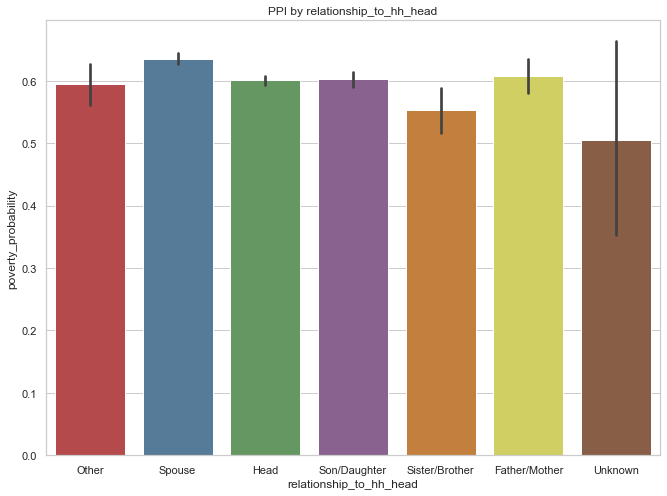

In [33]:
    sns.set_style("whitegrid")
    sns.set_palette("Set1", n_colors=7, desat=.7)
    fig, ax = plt.subplots(figsize=(11,8))
    sns.barplot('relationship_to_hh_head', 'poverty_probability', data=df) #order=['Under 30', '30 to 44', '45 to 59', '60 or Over']
    plt.xlabel('relationship_to_hh_head') # Set text for the x axis
    plt.ylabel('poverty_probability')# Set text for y axis
    plt.title('PPI' + ' by ' + 'relationship_to_hh_head')
    plt.show()


In [34]:
religion_categories = {'N':'N_Q', 'O':'O_P',
                       'P':'O_P', 'Q':'N_Q','X':'X'}
df['religion'] = [religion_categories[x] for x in df['religion']]
print(df['religion'].value_counts())

#num_shocks_last_year 4_5
num_shocks_last_year_categories = {0:'0', 1:'1', 2:'2',
                       3:'3', 4:'4_5', 5:'4_5'}
df['num_shocks_last_year'] = [num_shocks_last_year_categories[x] for x in df['num_shocks_last_year']]
print(df['num_shocks_last_year'].value_counts())

#num_formal_institutions_last_year 3_or_over
num_formal_institutions_last_year_categories = {0:'0', 1:'1', 2:'2',
                       3:'3_4_5_6', 4:'3_4_5_6', 5:'3_4_5_6', 6:'3_4_5_6'}
df['num_formal_institutions_last_year'] = [num_formal_institutions_last_year_categories[x] for x in df['num_formal_institutions_last_year']]
print(df['num_formal_institutions_last_year'].value_counts())

#num_informal_institutions_last_year 2_or_over
num_informal_institutions_last_year_categories = {0:'0', 1:'1', 2:'2_3_4',
                       3:'2_3_4', 4:'2_3_4'}
df['num_informal_institutions_last_year'] = [num_informal_institutions_last_year_categories[x] for x in df['num_informal_institutions_last_year']]
print(df['num_informal_institutions_last_year'].value_counts())

relationship_to_hh_head_categories = {'Other':'Other', 'Spouse':'Spouse',
                                      'Head':'Head',
                                      'Son/Daughter':'Son/Daughter',
                                      'Sister/Brother':'Sister/Brother',
                                      'Father/Mother': 'Father/Mother',
                                      'Unknown':'Other'}
df['relationship_to_hh_head'] = [relationship_to_hh_head_categories[x] for x in df['relationship_to_hh_head']]
print(df['relationship_to_hh_head'].value_counts())

N_Q    5524
X      5297
O_P    1779
Name: religion, dtype: int64
0      5004
1      3860
2      1942
3      1142
4_5     652
Name: num_shocks_last_year, dtype: int64
0          5802
1          5068
2          1373
3_4_5_6     357
Name: num_formal_institutions_last_year, dtype: int64
0        10583
1         1734
2_3_4      283
Name: num_informal_institutions_last_year, dtype: int64
Head              5229
Spouse            4162
Son/Daughter      2177
Father/Mother      415
Other              339
Sister/Brother     278
Name: relationship_to_hh_head, dtype: int64


Create violin plots for the new features:

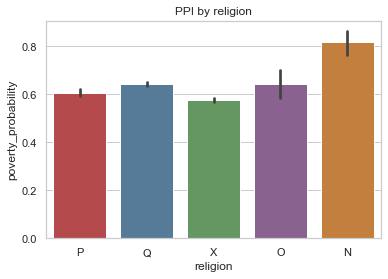

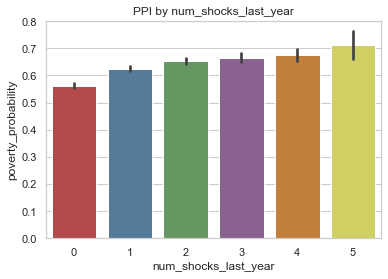

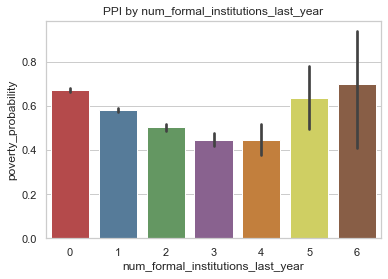

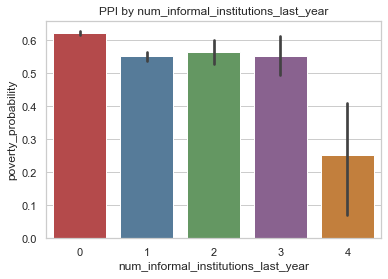

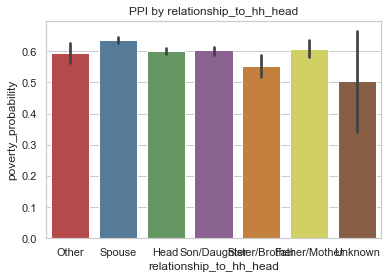

In [34]:
plot_bar_1(df, 'religion', 'poverty_probability', 'PPI') 

plot_bar_1(df, 'num_shocks_last_year', 'poverty_probability', 'PPI') 

plot_bar_1(df, 'num_formal_institutions_last_year', 'poverty_probability', 'PPI') 

plot_bar_1(df, 'num_informal_institutions_last_year', 'poverty_probability', 'PPI') 

plot_bar_1(df, 'relationship_to_hh_head', 'poverty_probability', 'PPI') 

Removing values named 'Unknown' for relationship_to_hh_head was attempted, but it worsened our model.

#### Transforming numeric features

Transformed numeric features worsened our model.

In [36]:
df.head()

,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,can_add,...,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability,cbrt_poverty_probability,squared_poverty_probability,age_group
0,C,False,18.0,True,True,O_P,Other,1.0,True,True,...,False,False,False,1,0,1,0.515,0.801559,0.265225,Under 30
1,C,True,30.0,True,True,O_P,Other,1.0,True,True,...,False,False,False,1,0,0,0.981,0.993626,0.962361,30 to 44
2,A,False,20.0,True,True,N_Q,Spouse,1.0,True,True,...,False,False,False,0,0,0,0.982,0.993964,0.964324,Under 30
3,A,False,61.0,False,True,N_Q,Head,0.0,False,True,...,False,False,False,0,0,0,0.879,0.957921,0.772641,60 or Over
4,D,False,26.0,True,True,X,Spouse,1.0,True,False,...,False,False,False,1,0,3,0.796,0.926768,0.633616,Under 30


In [37]:
df.drop('age', axis = 1, inplace = True)

In [38]:
df.head()

,country,is_urban,female,married,religion,relationship_to_hh_head,education_level,literacy,can_add,can_divide,...,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability,cbrt_poverty_probability,squared_poverty_probability,age_group
0,C,False,True,True,O_P,Other,1.0,True,True,True,...,False,False,False,1,0,1,0.515,0.801559,0.265225,Under 30
1,C,True,True,True,O_P,Other,1.0,True,True,True,...,False,False,False,1,0,0,0.981,0.993626,0.962361,30 to 44
2,A,False,True,True,N_Q,Spouse,1.0,True,True,True,...,False,False,False,0,0,0,0.982,0.993964,0.964324,Under 30
3,A,False,False,True,N_Q,Head,0.0,False,True,True,...,False,False,False,0,0,0,0.879,0.957921,0.772641,60 or Over
4,D,False,True,True,X,Spouse,1.0,True,False,True,...,False,False,False,1,0,3,0.796,0.926768,0.633616,Under 30


In [39]:
df.shape

(12600, 57)

## Encoding 

In [40]:
df

,country,is_urban,female,married,religion,relationship_to_hh_head,education_level,literacy,can_add,can_divide,...,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability,cbrt_poverty_probability,squared_poverty_probability,age_group
0,C,False,True,True,O_P,Other,1.0,True,True,True,...,False,False,False,1,0,1,0.515,0.801559,0.265225,Under 30
1,C,True,True,True,O_P,Other,1.0,True,True,True,...,False,False,False,1,0,0,0.981,0.993626,0.962361,30 to 44
2,A,False,True,True,N_Q,Spouse,1.0,True,True,True,...,False,False,False,0,0,0,0.982,0.993964,0.964324,Under 30
3,A,False,False,True,N_Q,Head,0.0,False,True,True,...,False,False,False,0,0,0,0.879,0.957921,0.772641,60 or Over
4,D,False,True,True,X,Spouse,1.0,True,False,True,...,False,False,False,1,0,3,0.796,0.926768,0.633616,Under 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,C,True,False,True,O_P,Head,1.0,True,True,True,...,False,False,False,2,0,1,0.990,0.996655,0.980100,45 to 59
12596,D,False,False,False,O_P,Head,0.0,True,True,True,...,False,False,False,0,0,0,0.950,0.983048,0.902500,60 or Over
12597,J,False,True,False,X,Head,1.0,False,True,False,...,False,True,False,0,1,0,0.342,0.699319,0.116964,45 to 59
12598,I,False,False,True,N_Q,Head,0.0,False,True,True,...,False,False,False,0,0,0,0.846,0.945780,0.715716,30 to 44


In [41]:
df.relationship_to_hh_head.value_counts()

Head              5229
Spouse            4162
Son/Daughter      2177
Father/Mother      415
Other              339
Sister/Brother     278
Name: relationship_to_hh_head, dtype: int64

In [42]:
df.columns

Index(['country', 'is_urban', 'female', 'married', 'religion',
       'relationship_to_hh_head', 'education_level', 'literacy', 'can_add',
       'can_divide', 'can_calc_percents', 'can_calc_compounding',
       'employed_last_year', 'employment_category_last_year',
       'employment_type_last_year', 'share_hh_income_provided',
       'income_ag_livestock_last_year', 'income_friends_family_last_year',
       'income_government_last_year', 'income_own_business_last_year',
       'income_private_sector_last_year', 'income_public_sector_last_year',
       'num_times_borrowed_last_year', 'borrowing_recency', 'formal_savings',
       'informal_savings', 'cash_property_savings', 'has_insurance',
       'has_investment', 'num_shocks_last_year',
       'avg_shock_strength_last_year', 'borrowed_for_emergency_last_year',
       'borrowed_for_daily_expenses_last_year',
       'borrowed_for_home_or_biz_last_year', 'phone_technology', 'can_call',
       'can_text', 'can_use_internet', 'can_make_tr

In [43]:
df["country"] = df['country'].replace("J",0).replace("D",1).replace("I",2).replace("G",3).replace("A",4).replace("C",5).replace("F",6)
df["is_urban"] = df['is_urban'].replace(True,1).replace(False,0)
df["female"] = df['female'].replace(True,1).replace(False,0)
df["married"] = df['married'].replace(True,1).replace(False,0)
df["religion"] = df["religion"].replace('N_Q',0).replace('X',1).replace('O_P',2)
df["relationship_to_hh_head"] = df['relationship_to_hh_head'].replace("Head",0).replace("Spouse",1).replace("Son/Daughter",2).replace("Father/Mother",3).replace("Other",4).replace("Sister/Brother",5)
df["literacy"] = df['literacy'].replace(True,1).replace(False,0)
df["can_add"] = df['can_add'].replace(True,1).replace(False,0)
df["can_divide"] = df['can_divide'].replace(True,1).replace(False,0)
df["can_calc_percents"] = df['can_calc_percents'].replace(True,1).replace(False,0)
df["can_calc_compounding"] = df['can_calc_compounding'].replace(True,1).replace(False,0)
df["can_calc_compounding"] = df['can_calc_compounding'].replace(True,1).replace(False,0)
df["employed_last_year"] = df['employed_last_year'].replace(True,1).replace(False,0)
df["employment_category_last_year"] = df['employment_category_last_year'].replace("employed",0).replace("housewife_or_student",1).replace("other",2).replace("unemployed",3).replace("retired_or_disabled",4)
df["employment_type_last_year"] = df["employment_type_last_year"].replace('not_working',0).replace('self_employed',1).replace('irregular_seasonal',2).replace("salaried",3).replace("other",4)
df["income_ag_livestock_last_year"] = df['income_ag_livestock_last_year'].replace(True,1).replace(False,0)
df["income_friends_family_last_year"] = df['income_friends_family_last_year'].replace(True,1).replace(False,0)
df["income_government_last_year"] = df['income_government_last_year'].replace(True,1).replace(False,0)
df["income_own_business_last_year"] = df['income_own_business_last_year'].replace(True,1).replace(False,0)
df["income_private_sector_last_year"] = df['income_private_sector_last_year'].replace(True,1).replace(False,0)
df["income_public_sector_last_year"] = df['income_public_sector_last_year'].replace(True,1).replace(False,0)
df["formal_savings"] = df['formal_savings'].replace(True,1).replace(False,0)
df["informal_savings"] = df['informal_savings'].replace(True,1).replace(False,0)
df["cash_property_savings"] = df['cash_property_savings'].replace(True,1).replace(False,0)
df["has_insurance"] = df['has_insurance'].replace(True,1).replace(False,0)
df["has_investment"] = df['has_investment'].replace(True,1).replace(False,0)
df["borrowed_for_emergency_last_year"] = df['borrowed_for_emergency_last_year'].replace(True,1).replace(False,0)
df["borrowed_for_daily_expenses_last_year"] = df['borrowed_for_daily_expenses_last_year'].replace(True,1).replace(False,0)
df["borrowed_for_home_or_biz_last_year"] = df['borrowed_for_home_or_biz_last_year'].replace(True,1).replace(False,0)
df["can_call"] = df['can_call'].replace(True,1).replace(False,0)
df["can_text"] = df['can_text'].replace(True,1).replace(False,0)
df["can_use_internet"] = df['can_use_internet'].replace(True,1).replace(False,0)
df["can_make_transaction"] = df['can_make_transaction'].replace(True,1).replace(False,0)
df["advanced_phone_use"] = df['advanced_phone_use'].replace(True,1).replace(False,0)
df["reg_bank_acct"] = df['reg_bank_acct'].replace(True,1).replace(False,0)
df["reg_mm_acct"] = df['reg_mm_acct'].replace(True,1).replace(False,0)
df["reg_formal_nbfi_account"] = df['reg_formal_nbfi_account'].replace(True,1).replace(False,0)
df["financially_included"] = df['financially_included'].replace(True,1).replace(False,0)
df["active_bank_user"] = df['active_bank_user'].replace(True,1).replace(False,0)
df["active_mm_user"] = df['active_mm_user'].replace(True,1).replace(False,0)
df["active_formal_nbfi_user"] = df['active_formal_nbfi_user'].replace(True,1).replace(False,0)
df["active_informal_nbfi_user"] = df['active_informal_nbfi_user'].replace(True,1).replace(False,0)
df["nonreg_active_mm_user"] = df['nonreg_active_mm_user'].replace(True,1).replace(False,0)
df["age_group"] = df['age_group'].replace("Under 30",0).replace("30 to 44",1).replace("45 to 59",2).replace("60 or Over",3)
df["has_investment"] = df['has_investment'].replace(True,1).replace(False,0)
df["borrowed_for_daily_expenses_last_year"] = df['borrowed_for_daily_expenses_last_year'].replace(True,1).replace(False,0)

In [44]:
df.dtypes

country                                    int64
is_urban                                   int64
female                                     int64
married                                    int64
religion                                   int64
relationship_to_hh_head                    int64
education_level                          float64
literacy                                   int64
can_add                                    int64
can_divide                                 int64
can_calc_percents                          int64
can_calc_compounding                       int64
employed_last_year                         int64
employment_category_last_year              int64
employment_type_last_year                  int64
share_hh_income_provided                 float64
income_ag_livestock_last_year              int64
income_friends_family_last_year            int64
income_government_last_year                int64
income_own_business_last_year              int64
income_private_secto

In [45]:
for x in df.columns:
    if df[x].dtypes == "O":
        print(x)

num_shocks_last_year
num_formal_institutions_last_year
num_informal_institutions_last_year


In [46]:
df["num_shocks_last_year"] = df['num_shocks_last_year'].replace("0",0).replace("1",1).replace("2",2).replace("3",3).replace("4_5",1)
df["num_formal_institutions_last_year"] = df['num_formal_institutions_last_year'].replace("0",0).replace("1",1).replace("2",2).replace("3_4_5_6",3)
df["num_informal_institutions_last_year"] = df['num_informal_institutions_last_year'].replace("0",0).replace("1",1).replace("2_3_4",2)

In [47]:
df.dtypes

country                                    int64
is_urban                                   int64
female                                     int64
married                                    int64
religion                                   int64
relationship_to_hh_head                    int64
education_level                          float64
literacy                                   int64
can_add                                    int64
can_divide                                 int64
can_calc_percents                          int64
can_calc_compounding                       int64
employed_last_year                         int64
employment_category_last_year              int64
employment_type_last_year                  int64
share_hh_income_provided                 float64
income_ag_livestock_last_year              int64
income_friends_family_last_year            int64
income_government_last_year                int64
income_own_business_last_year              int64
income_private_secto

In [48]:
df.num_informal_institutions_last_year.value_counts()

0    10583
1     1734
2      283
Name: num_informal_institutions_last_year, dtype: int64

In [49]:
# Labels = np.array(df['poverty_probability'])

### Model selection

#### Eliminate low variance features

We eliminate features with low variance using the scikit-learn `VarianceThreshold` based function.

In [50]:
# from sklearn.feature_selection import VarianceThreshold
# def variance_threshold_selector(data, threshold=0.1):
#     selector = VarianceThreshold(threshold)
#     selector.fit(data)
#     return data[data.columns[selector.get_support(indices=True)]]

In [51]:
df1 = df.copy()

In [52]:
df1 = df1.drop(['poverty_probability','cbrt_poverty_probability','squared_poverty_probability'], axis = 1)

In [53]:
df1.head()

,country,is_urban,female,married,religion,relationship_to_hh_head,education_level,literacy,can_add,can_divide,...,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,age_group
0,5,0,1,1,2,4,1.0,1,1,1,...,1,1,0,0,0,0,1,0,1,0
1,5,1,1,1,2,4,1.0,1,1,1,...,1,1,0,0,0,0,1,0,0,1
2,4,0,1,1,0,1,1.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,1,0,0,0.0,0,1,1,...,0,0,0,0,0,0,0,0,0,3
4,1,0,1,1,1,1,1.0,1,0,1,...,0,0,0,0,0,0,1,0,3,0


In [54]:
# df1 = variance_threshold_selector(df1)
# df1

In [55]:
df1.shape

(12600, 54)

We reduced 7 columns by eliminate low variance

In [56]:
df2 = df[['poverty_probability','cbrt_poverty_probability','squared_poverty_probability']]

In [57]:
# df = pd.concat([df1, df2], axis=1)

In [58]:
df.shape

(12600, 57)

In [59]:
# Finally merging back df with 7 less features which has significantly no impact on target

### Recursive feature elimination

We used the scikit-learn `RFECV` function to determine which features to retain using a cross validation method, with the ridge regression model:

In [60]:
y= df2[['poverty_probability']]

In [61]:
X = df1.copy()

In [63]:
from feature_engine.selection import (
    DropDuplicateFeatures,
    DropConstantFeatures,
    DropDuplicateFeatures,
    DropCorrelatedFeatures,
    SmartCorrelatedSelection,
    SelectByShuffling,
    SelectBySingleFeaturePerformance,
    RecursiveFeatureElimination,
)

In [64]:
constant = DropConstantFeatures(tol=1)

constant.fit(X)

DropConstantFeatures()

In [65]:
len(constant.features_to_drop_)
# the constant features can be found in the attribute
# features_to_drop_

0

In [66]:
# show the names of the first 3 constant features

constant.features_to_drop_[0:3]

[]

In [67]:
# with tol=0.998 we tell the transformer that we want to remove
# all features that show the same value in more than 99.8% of the
# observations in the dataset

quasi_constant = DropConstantFeatures(tol=0.998)

# find quasi-constant features in the train set
quasi_constant.fit(X)

DropConstantFeatures(tol=0.998)

In [68]:
# the constant features can be found in the attribute
# features_to_drop_

len(constant.features_to_drop_)

0

In [69]:
# show the names of the first 3 constant features

quasi_constant.features_to_drop_[0:3]

[]

In [70]:
duplicates = DropDuplicateFeatures()

# find duplicated features in the train set
duplicates.fit(X)

DropDuplicateFeatures()

In [71]:
# the groups or identical variables can be seen in the 
# attribute duplicated_feature_sets

duplicates.duplicated_feature_sets_

[]

In [72]:
# in the attribute features_to_drop_ we find the variables
# from the groups of duplicates that will be dropped

# the transformer only leaves 1 variable per group and removes
# the rest.

duplicates.features_to_drop_

set()

In [73]:
# if variables is set to None, the transformer will examine all variables
# we can choose the correlation method to use (pearson, spearman or kendal)
# and the correlation threshold

correlated = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.8)

# find correlated variables in the train set
correlated.fit(X)

DropCorrelatedFeatures()

In [74]:
# in the attribute correlated_feature_sets_ we find the 
# variables that are correlated with each other

# note that several variables can be correlated with each other

correlated.correlated_feature_sets_

[{'borrowing_recency', 'num_times_borrowed_last_year'},
 {'active_bank_user', 'reg_bank_acct'},
 {'active_mm_user', 'reg_mm_acct'},
 {'active_formal_nbfi_user', 'reg_formal_nbfi_account'},
 {'active_informal_nbfi_user', 'num_informal_institutions_last_year'}]

In [75]:
# in the features_to_drop_ the transformer stores all the
# variables that will be dropped. 

# the transformer selects 1 variable per group of correlated ones
# and drops the rest on a first come, first serve basis

len(correlated.features_to_drop_)

5

In [76]:
# remove correlated variables

print('Number of variables before removing correlated: ', X.shape[1])

X = correlated.transform(X)

print('Number of variables after removing correlated: ', X.shape[1])

Number of variables before removing correlated:  54
Number of variables after removing correlated:  49


In [77]:
smart_corr = SmartCorrelatedSelection(
    variables=None, # examines all variables
    method="pearson", # the correlation method
    threshold=0.7, # the correlation coefficient threshold
    missing_values="ignore",
    selection_method="model_performance", # how to select the features
    estimator=RandomForestRegressor(n_estimators=10, random_state=1), # the model from which to derive the importance
)

# find correlated features and select the best from each group

# the method builds a random forest using each single feature from the correlated feature group
# and retains the feature from the group with the best performance

smart_corr.fit(X, y)

SmartCorrelatedSelection(estimator=RandomForestRegressor(n_estimators=10,
                                                         random_state=1),
                         selection_method='model_performance', threshold=0.7)

In [78]:
y.columns

Index(['poverty_probability'], dtype='object')

In [79]:
# the correlated feature groups

smart_corr.correlated_feature_sets_

[{'employed_last_year', 'employment_category_last_year'},
 {'avg_shock_strength_last_year', 'num_shocks_last_year'},
 {'phone_ownership', 'phone_technology'},
 {'num_financial_activities_last_year', 'num_formal_institutions_last_year'}]

In [80]:
import sklearn

In [81]:
# remove correlated variables

print('Number of variables before removing correlated: ', X.shape[1])

X = smart_corr.transform(X)

print('Number of variables after removing correlated: ', X.shape[1])

Number of variables before removing correlated:  49
Number of variables after removing correlated:  45


# Split the Dataset

With the model matrix constructed, we now create randomly sampled training and test data sets in a 8:2 ratio:

In [82]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Rescale numeric features

We use the `StandardScaler` to z-score scale the numeric features.

In [83]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test= scaler.transform(x_test)
# print(x_train)

# Construct the Regression Models

Different regression models are tested with optimized hyperparameters. We first fit the models with pre-selected parameters to our train data, and fine-tune them recursively. Here we will test Gradient Boosting Regressor, XGboost Regressor and LGB Regressor, the current best-performing algorithms for data science competitions.

In [84]:
GBoost = GradientBoostingRegressor()
model_xgb = xgb.XGBRegressor()
model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves = 32,
                              learning_rate=0.01)

### Hyperparameter tuning

Hyperparameters are manually and recursively selected with a grid search, here is an example of finding the optimized value for XGB Regressor's `n_estimators`:

In [85]:
nr.seed(265)
inside = ms.KFold(n_splits=5, shuffle = True)
nr.seed(562)
outside = ms.KFold(n_splits=5, shuffle = True)

nr.seed(2652)
## Define the dictionary for the grid search and the model object to search on
param_grid = {'n_estimators': [2000, 3000]}

## Perform the grid search over the parameters
gsearch = ms.GridSearchCV(estimator = model_lgb, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'r2',
                      return_train_score = True)

Fit the cross validated grid search over the data and print the best parameter value:

In [86]:
Labels = df['poverty_probability'].to_numpy()
Labels

array([0.515, 0.981, 0.982, ..., 0.342, 0.846, 0.569])

In [87]:
X.shape

(12600, 45)

In [88]:
Features_reduced = X.to_numpy()
Features_reduced

array([[5., 0., 1., ..., 0., 1., 0.],
       [5., 1., 1., ..., 0., 1., 1.],
       [4., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 2.],
       [2., 0., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 3., 0.]])

In [89]:
gsearch.fit(Features_reduced, Labels)
gsearch.best_params_, gsearch.best_score_

({'n_estimators': 2000}, 0.4261987186304843)

Optimized parameters are plugged into the models:

In [165]:
GBoost = GradientBoostingRegressor()

model_xgb = xgb.XGBRegressor(max_depth = 5, min_child_weight = 0, gamma = 0, 
                           subsample = 0.8, colsample_bytree = 0.8, 
                           scale_pos_weight = 1, reg_lambda = 1,
                           learning_rate =0.01, n_estimators=2000, 
                           objective = 'reg:squarederror', seed = 14)

model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves = 32,
                              learning_rate=0.01, n_estimators=2100, 
                              bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.4,
                              min_data_in_leaf = 5,  
                              feature_fraction_seed=3, bagging_seed=2)

### Evaluate models with cross validation
We define a cross validation strategy to evaluate the r-square of our models:

In [91]:
#Validation function
n_folds = 5

def r2_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train)
    r2 = cross_val_score(model, x_train, y_train, scoring="r2", cv = kf)
    return(r2)

In [92]:
score = r2_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.4215 (0.0089)



In [93]:
score = r2_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.4265 (0.0091)



In [94]:
score = r2_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_by

# Model Stacking

Here, 2 model stacking approaches are applied - 
1. averaging base models, and 
2. stacking averaged models and adding a meta-model

### Averaging base models
We build a new class to extend scikit-learn with our model and leverage inheritance:

In [95]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

Averaging XBG and LGB and print out their cross-validation r-square score:

In [96]:
averaged_models = AveragingModels(models = (model_xgb, model_lgb))

score = r2_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_by

### Adding a meta-model
Let's create a class for stacking average models:

In [101]:
X

,country,is_urban,female,married,religion,relationship_to_hh_head,education_level,literacy,can_add,can_divide,...,phone_ownership,advanced_phone_use,reg_bank_acct,reg_mm_acct,reg_formal_nbfi_account,financially_included,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,age_group
0,5,0,1,1,2,4,1.0,1,1,1,...,1,0,1,0,0,1,0,0,1,0
1,5,1,1,1,2,4,1.0,1,1,1,...,2,0,1,0,0,1,0,0,1,1
2,4,0,1,1,0,1,1.0,1,1,1,...,2,0,0,0,0,0,0,0,0,0
3,4,0,0,1,0,0,0.0,0,1,1,...,0,0,0,0,0,0,0,0,0,3
4,1,0,1,1,1,1,1.0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,5,1,0,1,2,0,1.0,1,1,1,...,2,0,1,0,0,1,0,0,2,2
12596,1,0,0,0,2,0,0.0,1,1,1,...,0,0,0,0,0,0,0,0,0,3
12597,0,0,1,0,1,0,1.0,0,1,0,...,2,0,0,1,0,1,1,0,0,2
12598,2,0,0,1,0,0,0.0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [105]:
y

,poverty_probability
0,0.515
1,0.981
2,0.982
3,0.879
4,0.796
...,...
12595,0.990
12596,0.950
12597,0.342
12598,0.846


In [138]:
(GBoost)

GradientBoostingRegressor(learning_rate=0.01, loss='ls', max_depth=5,
                          max_features='sqrt', min_samples_leaf=7,
                          min_samples_split=15, n_estimators=2000,
                          random_state=1)

In [137]:
X.shape[0]

12600

Stacking GBR on top of the averaged XBG and LGB and print out their cross-validation r-square score:

In [143]:
import sklearn
from sklearn.ensemble import StackingRegressor

In [153]:
models = [model_xgb,model_lgb]

In [154]:
from mlxtend.regressor import StackingCVRegressor

In [166]:
stack = StackingCVRegressor(regressors= models,
                            meta_regressor=GBoost, cv=10,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=1)

In [156]:
stack.fit(x_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_by

StackingCVRegressor(cv=10,
                    meta_regressor=GradientBoostingRegressor(learning_rate=0.01,
                                                             loss='ls',
                                                             max_depth=5,
                                                             max_features='sqrt',
                                                             min_samples_leaf=7,
                                                             min_samples_split=15,
                                                             n_estimators=2000,
                                                             random_state=1),
                    random_state=1,
                    regressors=[XGBRegressor(base_score=0.5, booster='gbtree',
                                             callbacks=None,
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                   

In [158]:
pred = stack.predict(x_test)

In [159]:
from sklearn.metrics import r2_score

In [160]:
score = r2_score(y_test, pred)

In [161]:
print('Model: {0}, MAE: {1}'.format(type(stack).__name__, score))

Model: StackingCVRegressor, MAE: 0.4303420802111386


In this case, it looks like simply averaging XGB and LGB gives a better score.

We then create a function to evaluate the models' performances on the test data after fitting to the training data.

In [107]:
def rsquare(y, y_pred):
    return r2_score(y, y_pred)

In [108]:
averaged_models.fit(x_train, y_train)
avg_pred = averaged_models.predict(x_test)
print(rsquare(y_test, avg_pred))

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
0.4352029268508808


In [119]:
# stacked_averaged_models.fit(x_train, y_train)
# stacked_pred = stacked_averaged_models.predict(x_test)
# print(rsquare(y_test, stacked_pred))

In [109]:
GBoost.fit(x_train, y_train)
gb_pred = GBoost.predict(x_test)
print(rsquare(y_test, gb_pred))

0.42558361516658494


In [110]:
model_xgb.fit(x_train, y_train)
xgb_pred = model_xgb.predict(x_test)
print(rsquare(y_test, xgb_pred))

0.4314547670829595


In [111]:
model_lgb.fit(x_train, y_train)
lgb_pred = model_lgb.predict(x_test)
print(rsquare(y_test, lgb_pred))

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
0.43573287234013014


In [167]:
score = r2_cv(stack)

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_by

In [168]:
score.mean()

0.4320121792164853

For meaningful interpretation, predicted scores with negative values are converted to 0, and scores larger than 1 are converted to 1:

In [112]:
avg_pred[avg_pred < 0] = 0
avg_pred[avg_pred > 1] = 1

In [118]:
# stacked_pred[stacked_pred < 0] = 0
# stacked_pred[stacked_pred > 1] = 1

In [114]:
gb_pred[gb_pred < 0] = 0
gb_pred[gb_pred > 1] = 1

In [115]:
xgb_pred[xgb_pred < 0] = 0
xgb_pred[xgb_pred > 1] = 1

In [116]:
lgb_pred[lgb_pred < 0] = 0
lgb_pred[lgb_pred > 1] = 1

In [117]:
ensemble = avg_pred*0.55 + lgb_pred*0.45
print('R2 score on test data:')
print(rsquare(y_test, ensemble))

R2 score on test data:
0.4358446645041578


# Print metrics and evaluations

The model's performance metrics on the locally splitted test data is printed:

In [122]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
print_metrics(y_test, lgb_pred, 105)    

Mean Square Error      = 0.04660316097887786
Root Mean Square Error = 0.21587765280102028
Mean Absolute Error    = 0.17159834294081766
Median Absolute Error  = 0.1416639805849445
R^2                    = 0.4357342204782534
Adjusted R^2           = 0.4114345761427413


A feature importance plot is created find out what are the top features, here a sample plot for XGB regressor is printed:

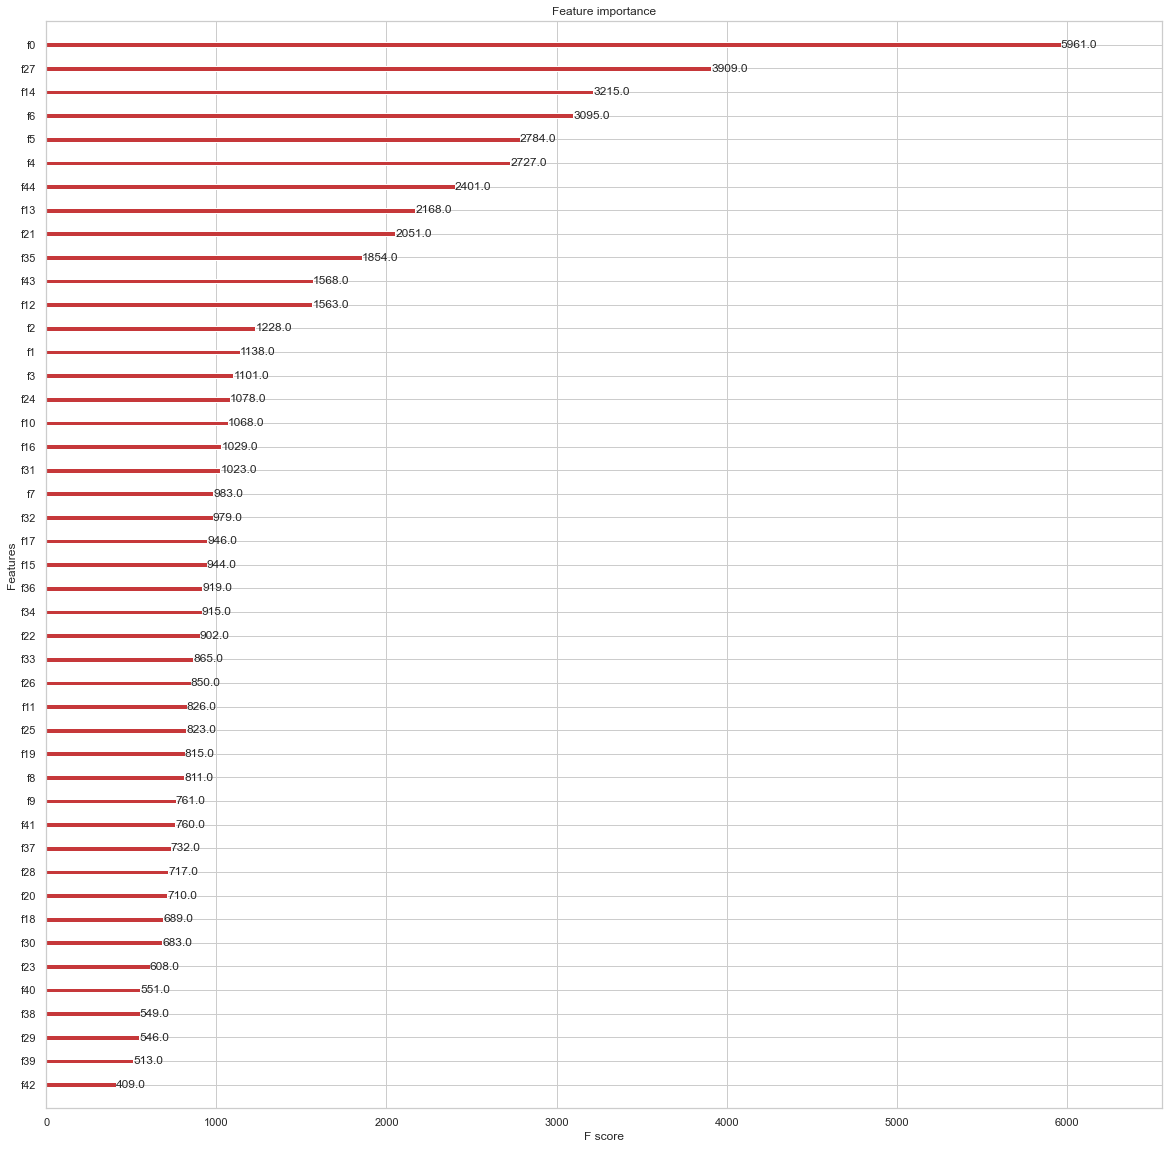

In [123]:
fimp = xgb.plot_importance(model_xgb)
fig = fimp.figure
fig.set_size_inches(20, 20)

In [124]:
# hist_plot(y_score, 'Predicted PPI')

Creating a residual histogram plot, a residual q-q plot, and a residuals vs. predicted values plot:

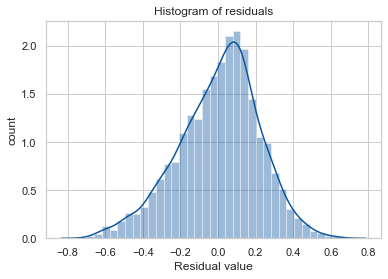

In [128]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, y_score.reshape(-1,1))
    ## now make the residual plots
    sns.set(style = 'whitegrid', palette='Blues_r')
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, lgb_pred)    

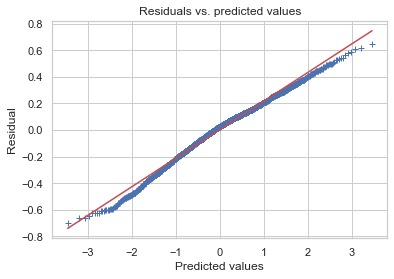

In [133]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, y_score.reshape(-1,1))
    ## now make the residual plots
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ss.probplot(resids.values.flatten(), plot = plt)
    ax.get_lines()[0].set_marker('+')
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, lgb_pred)   

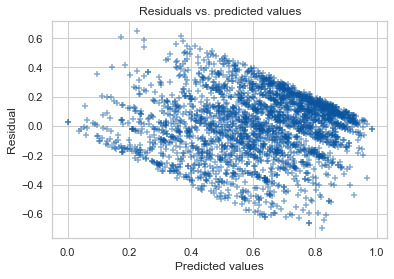

In [134]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False, marker="+", scatter_kws={'alpha':0.5})
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, lgb_pred) 